In [49]:
#from manage_data import get_datasets
# from manage_data import plot_coefficients_linSVC
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve


In [50]:
def plot_coefficients_linSVC(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(60, 20))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

In [51]:
def get_datasets(std_size=False):
    # My python only likes absolute paths 
    brca = pd.read_csv('C:\\Users\\sohai\\PycharmProjects\\comp3212-cancer-exploration\\data\\Gistic2_CopyNumber_BRCA', sep='\t')
    ovca = pd.read_csv('C:\\Users\sohai\\PycharmProjects\\comp3212-cancer-exploration\\data\\Gistic2_CopyNumber_OVCA', sep='\t')
    brca.set_index('Gene Symbol', inplace=True)
    ovca.set_index('Gene Symbol', inplace=True)
    brca = brca.transpose()
    ovca = ovca.transpose()
    brca['BRCA'] = 1
    ovca['BRCA'] = 0
    print('size brca, ovca', len(brca), len(ovca))
    if not std_size:
        print('normal size', len(brca)+len(ovca))
        df = pd.concat([brca, ovca[1:]])
    elif std_size:
        print('sampled size', len(ovca)+len(ovca))
        df = pd.concat([brca[0:len(ovca)], ovca[1:]])
    print(len(df), len(brca.transpose()-2) + len(ovca.transpose()-2))
    return df

df = get_datasets()
y = df['BRCA']
X = df.drop('BRCA', axis=1)

size brca, ovca 1080 579
normal size 1659
1658 49554


In [52]:
df.head()

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7,BRCA
TCGA-3C-AAAU-01,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,...,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,1
TCGA-3C-AALI-01,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,...,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,1
TCGA-3C-AALJ-01,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,...,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,1
TCGA-3C-AALK-01,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,...,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,1
TCGA-4H-AAAK-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,1


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state = 42)

scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalised_x_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

svc_unnorm = SVC(kernel='linear')
svc_unnorm.fit(X_train, y_train)
un_score = svc_unnorm.score(X_test, y_test)

svc_norm = SVC(kernel='linear')
svc_norm.fit(normalized_x_train, y_train)
nm_score = svc_norm.score(normalised_x_test, y_test)
print('unnormalised score =', un_score)
print('scaled score =', nm_score)

unnormalised score = 0.916058394160584
scaled score = 0.9051094890510949


In [54]:
x = 0.9999
pca = PCA(n_components=x)
pca.fit(X_train)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1658, 24776)
transformed shape: (1658, 997)


In [64]:
y_red = pd.Series(y)

df_redd = pd.DataFrame(X_pca)
svc_reddim = SVC(probability=True,kernel='linear')
# y_red
X_traind, X_testd, y_traind, y_testd = train_test_split(df_redd, y)
svc_reddim.fit(X_traind, y_traind)
svc_reddim.score(X_testd, y_testd)

0.9301204819277108

In [65]:
from sklearn.metrics import confusion_matrix
import itertools

# Making the new split given the PCA
X_train, X_test, y_train, y_test = train_test_split(df_redd, y)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [66]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [68]:
train_rf_predictions = svc_reddim.predict(X_train)
train_rf_probs = svc_reddim.predict_proba(X_train)[:, 1]

rf_predictions = svc_reddim.predict(X_test)
rf_probs = svc_reddim.predict_proba(X_test)[:, 1]

Recall Baseline: 1.0 Test: 0.99 Train: 0.99
Precision Baseline: 0.66 Test: 0.99 Train: 0.98
Roc Baseline: 0.5 Test: 0.99 Train: 0.99


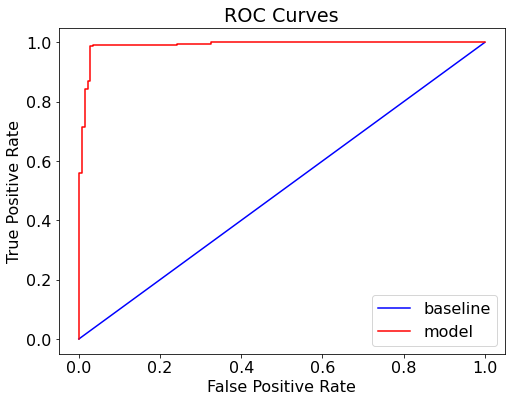

In [69]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)


Confusion matrix, without normalization
[[137   4]
 [  4 270]]


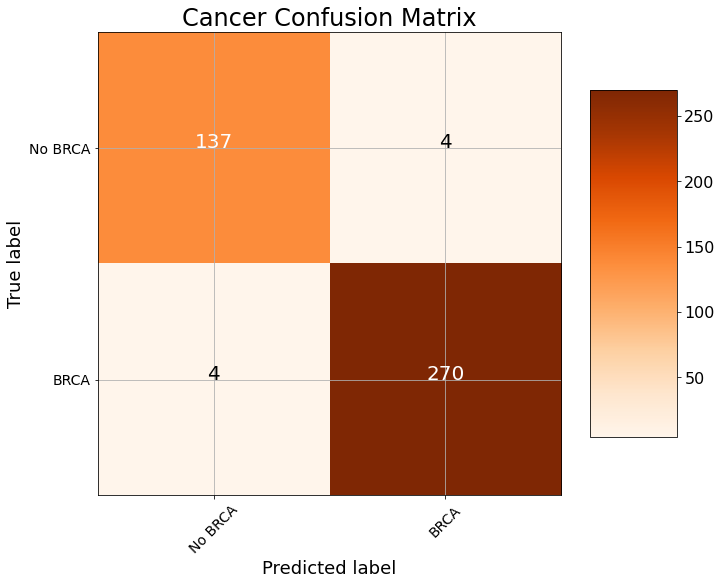

In [70]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['No BRCA', 'BRCA'],
                      title = 'Cancer Confusion Matrix')

997


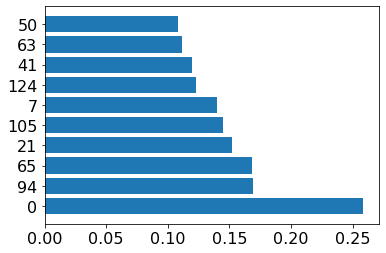

In [71]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

features_names = list(X_traind.columns)

print(len(features_names))
f_importances(abs(svc_reddim.coef_[0]), features_names, top=10)
